In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

In [2]:
def load_data(path):
    data = pd.read_csv(path)
    data["record_size"] = int(path.split("/")[-1].split(".")[0].split("_")[-1])
    return data

def assign_library(command: str) -> str:
    if "seq_io" in command:
        return "seq_io"
    elif "needletail" in command:
        return "needletail"
    elif "paraseq" in command:
        return "paraseq"
    elif "bio" in command:
        return "bio"
    elif "fastq-rs" in command:
        return "fastq-rs"
    else:
        raise ValueError(f"Unknown command: {command}")
    
def assign_batch(command: str) -> bool:
    if "batch" in command or "paraseq" in command:
        return "record_set"
    else:
        return "record"


paths = glob("../results/benchmark*.csv")

results = pd.concat([
    load_data(path) for path in paths
])
results["library"] = results["command"].apply(assign_library)
results["batched"] = results["command"].apply(assign_batch)
results

,command,mean,stddev,median,user,system,min,max,record_size,library,batched
0,psb -i data/records_30.fastq -l seq_io,0.191640,0.001775,0.191806,0.139837,0.051260,0.188468,0.194692,30,seq_io,record
1,psb -i data/records_30.fastq -l seq_io_batch,0.202419,0.001477,0.201802,0.155015,0.046800,0.200195,0.204922,30,seq_io,record_set
2,psb -i data/records_30.fastq -l needletail,0.188712,0.001672,0.188620,0.140381,0.047722,0.185915,0.193247,30,needletail,record
3,psb -i data/records_30.fastq -l paraseq,0.194934,0.001518,0.194370,0.145346,0.049015,0.192478,0.197470,30,paraseq,record_set
4,psb -i data/records_30.fastq -l fastq-rs,0.198703,0.001573,0.198883,0.151594,0.046494,0.196239,0.201359,30,fastq-rs,record
5,psb -i data/records_30.fastq -l fastq-rs_batch,0.222605,0.002151,0.222477,0.175552,0.082352,0.219754,0.226098,30,fastq-rs,record_set
6,psb -i data/records_30.fastq -l bio,0.869281,0.003593,0.868573,0.790503,0.075570,0.865211,0.875535,30,bio,record
0,psb -i data/records_200.fastq -l seq_io,0.390574,0.002185,0.389877,0.162199,0.226891,0.387877,0.393861,200,seq_io,record
1,psb -i data/records_200.fastq -l seq_io_batch,0.448962,0.002802,0.449228,0.220174,0.226819,0.444997,0.454444,200,seq_io,record_set
2,psb -i data/records_200.fastq -l needletail,0.393123,0.002341,0.393288,0.164877,0.226661,0.387520,0.395827,200,needletail,record


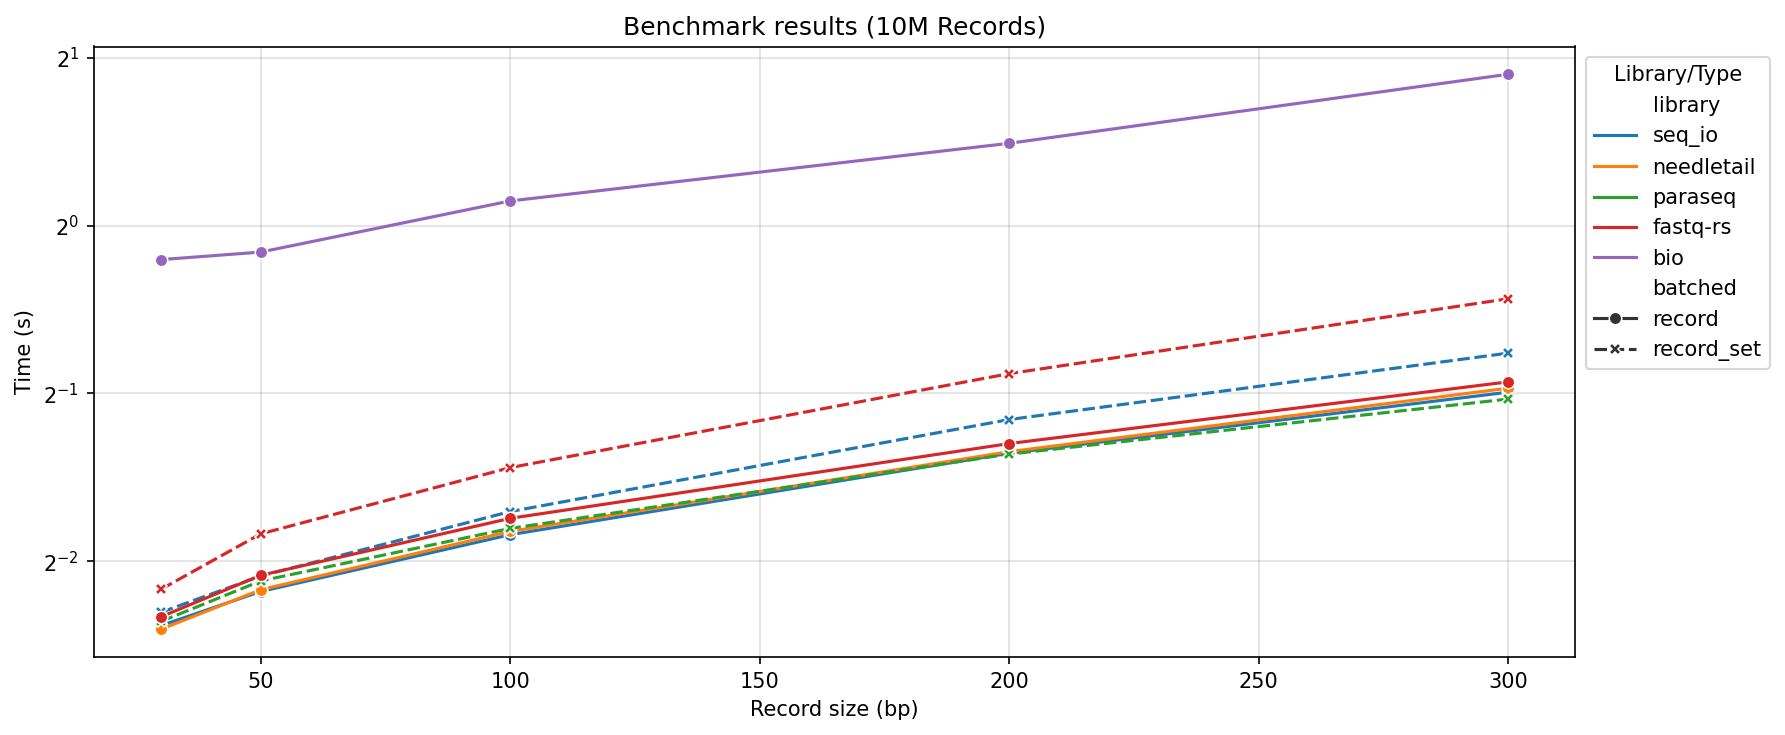

In [3]:
plt.figure(figsize=(12, 5), dpi=150)
sns.lineplot(
    data=results,
    x="record_size",
    y="mean",
    hue="library",
    style="batched",
    markers=True,
)
plt.yscale("log", base=2)
plt.xlabel("Record size (bp)")
plt.ylabel("Time (s)")
plt.title("Benchmark results (10M Records)")
plt.legend(title="Library/Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(linewidth=1, linestyle="-", color="black", alpha=0.1)
plt.tight_layout()
plt.savefig("benchmark.svg")
plt.show()

In [4]:
import os

input_files = glob("../data/records*.fastq")

file_sizes = pd.DataFrame([
    {
        "file": file,
        "file_size": os.path.getsize(file) / 1024 / 1024 / 1024, # GB
        "record_size": int(file.split("/")[-1].split(".")[0].split("_")[-1])
    }
    for file in input_files
])
file_sizes

,file,file_size,record_size
0,../data/records_100.fastq,2.019935,100
1,../data/records_50.fastq,1.088613,50
2,../data/records_300.fastq,5.745225,300
3,../data/records_30.fastq,0.716084,30
4,../data/records_200.fastq,3.882580,200


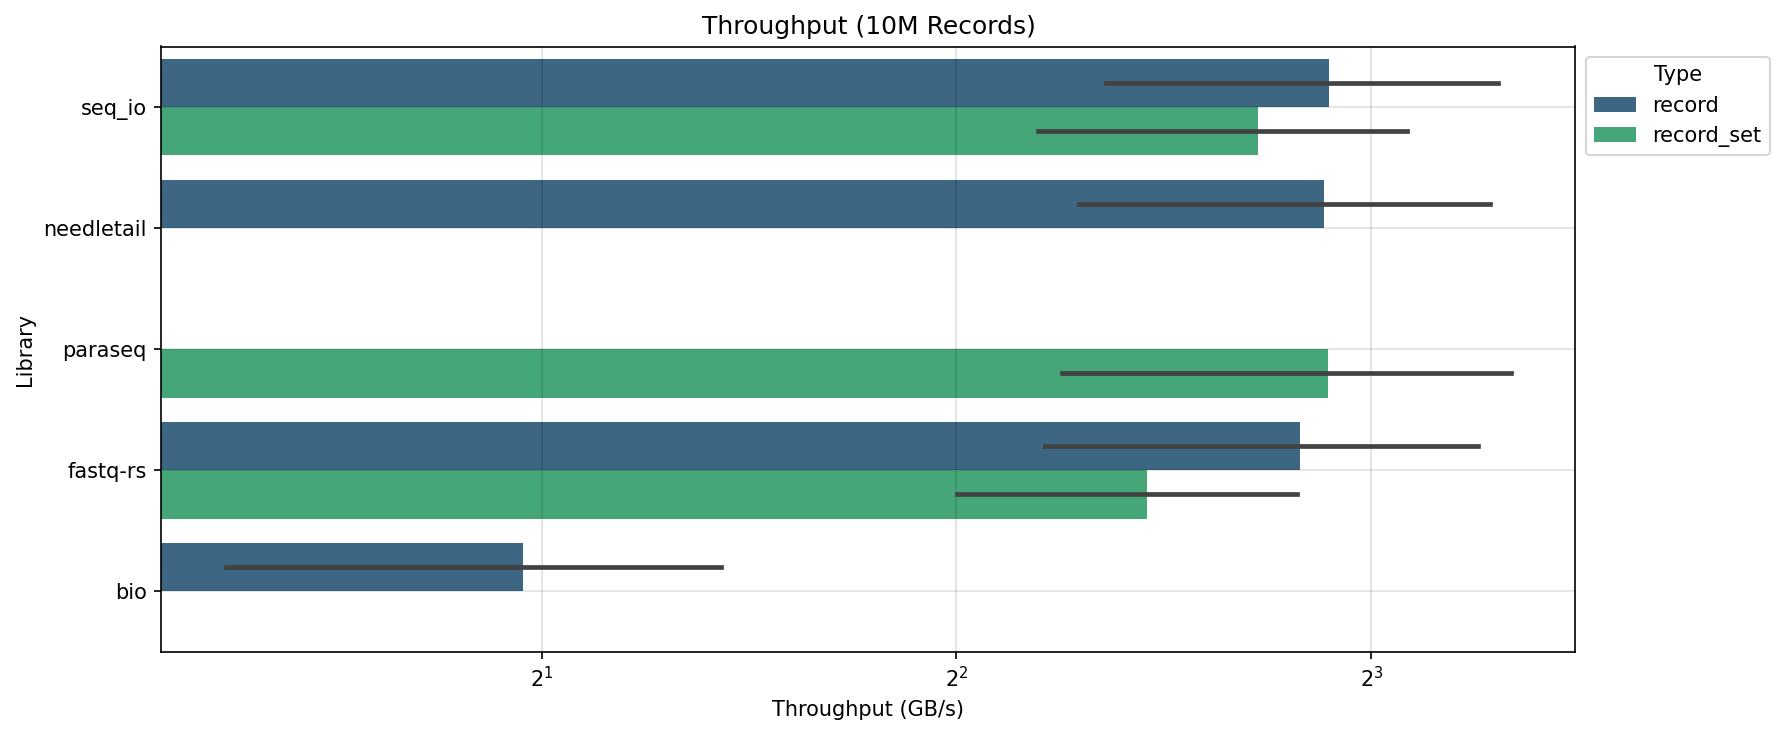

In [5]:
merged = results.merge(file_sizes, on="record_size")
merged["throughput"] = merged["file_size"] / merged["mean"]

plt.figure(figsize=(12, 5), dpi=150)
sns.barplot(
    data=merged,
    y="library",
    x="throughput",
    hue="batched",
    palette="viridis",
)
plt.xscale("log", base=2)
plt.xlabel("Throughput (GB/s)")
plt.ylabel("Library")
plt.title("Throughput (10M Records)")
plt.legend(title="Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(linewidth=1, linestyle="-", color="black", alpha=0.1)
plt.tight_layout()
plt.savefig("./throughput.svg")
plt.show()